<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [6]:

import numpy as np

def sum_prod(X, V):
    if not X:
        return np.array([]).reshape(-1, 1)  # пустой результат для пустого ввода
    total = None
    for mat, vec in zip(X, V):
        mat = np.array(mat)
        vec = np.array(vec)
        # Приведём вектор к форме (n, 1), если нужно
        if vec.ndim == 1:
            vec = vec.reshape(-1, 1)
        prod = mat @ vec
        if total is None:
            total = prod
        else:
            total += prod
    return total


# ------------------ ТЕСТЫ ------------------

def test_sum_prod_basic():
    X = [
        [[1, 0],
         [0, 1]],
        [[0, 1],
         [1, 0]]
    ]
    V = [
        [1, 2],
        [3, 4]
    ]
    expected = np.array([[1], [2]]) + np.array([[4], [3]])  # = [[5], [5]]
    result = sum_prod(X, V)
    assert np.allclose(result, expected)
    assert result.shape == (2, 1)

def test_sum_prod_empty():
    result = sum_prod([], [])
    expected = np.array([]).reshape(-1, 1)
    assert np.array_equal(result, expected)
    assert result.shape == (0, 1)

def test_sum_prod_single():
    X = [[[2, 3],
          [1, 4]]]
    V = [[1, 0]]
    expected = np.array([[2], [1]])
    result = sum_prod(X, V)
    assert np.allclose(result, expected)
    assert result.shape == (2, 1)

def test_sum_prod_1d_vectors():
    X = [
        [[1, 2],
         [3, 4]],
        [[0, 1],
         [1, 0]]
    ]
    V = [np.array([1, 1]), [2, 3]]  # смешанные типы: 1D массив и список
    # X0 @ V0 = [3, 7], X1 @ V1 = [3, 2] → сумма = [6, 9]
    expected = np.array([[6], [9]])
    result = sum_prod(X, V)
    assert np.allclose(result, expected)
    assert result.shape == (2, 1)

def test_sum_prod_zeros():
    X = [
        [[0, 0],
         [0, 0]],
        [[0, 0],
         [0, 0]]
    ]
    V = [[1, 2], [3, 4]]
    expected = np.array([[0], [0]])
    result = sum_prod(X, V)
    assert np.allclose(result, expected)

def test_sum_prod_different_sizes():
    # Все матрицы и векторы должны быть согласованными, но функция не проверяет это.
    # Тест на корректный размер — просто убедимся, что (3,3) и (3,) работают
    X = [
        [[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]]
    ]
    V = [[5, 6, 7]]
    expected = np.array([[5], [6], [7]])
    result = sum_prod(X, V)
    assert np.allclose(result, expected)
    assert result.shape == (3, 1)

# Запуск вручную (если не используешь pytest)
if __name__ == "__main__":
    test_sum_prod_basic()
    test_sum_prod_empty()
    test_sum_prod_single()
    test_sum_prod_1d_vectors()
    test_sum_prod_zeros()
    test_sum_prod_different_sizes()





<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [ ]:
def binarize(M, threshold=0.5):
    M = np.array(M)
    return (M > threshold).astype(int)





def test_binarize_default_threshold():
    M = [[0.2, 0.6],
         [0.5, 0.9]]
    expected = np.array([[0, 1],
                         [0, 1]])  # т.к. 0.5 не > 0.5 → 0
    result = binarize(M)
    assert np.array_equal(result, expected)

def test_binarize_custom_threshold():
    M = [[1, 2, 3],
         [4, 5, 6]]
    result = binarize(M, threshold=3)
    expected = np.array([[0, 0, 0],
                         [1, 1, 1]])
    assert np.array_equal(result, expected)

def test_binarize_empty():
    M = np.array([]).reshape(0, 2)
    result = binarize(M)
    assert result.shape == (0, 2)
    assert result.dtype == int

def test_binarize_1d():
    M = [0.1, 0.6, 0.5]
    result = binarize(M)
    expected = np.array([0, 1, 0])
    assert np.array_equal(result, expected)

def test_binarize_with_negatives():
    M = [-1, 0, 1]
    result = binarize(M, threshold=0)
    expected = np.array([0, 0, 1])
    assert np.array_equal(result, expected)

if __name__ == "__main__":
    test_binarize_default_threshold()
    test_binarize_custom_threshold()
    test_binarize_empty()
    test_binarize_1d()
    test_binarize_with_negatives()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [13]:
import numpy as np

def unique_rows(mat):
    if np.size(mat) == 0:
        return []
    mat = np.array(mat)
    result = []
    for row in mat:
        # np.unique с return_index=True позволяет сохранить порядок
        _, idx = np.unique(row, return_index=True)
        unique_in_order = row[np.sort(idx)]
        result.append(unique_in_order.tolist())
    return result


def unique_columns(mat):
    if np.size(mat) == 0:
        return []
    mat = np.array(mat)
    result = []
    for col in mat.T:  # транспонируем, чтобы итерироваться по столбцам
        _, idx = np.unique(col, return_index=True)
        unique_in_order = col[np.sort(idx)]
        result.append(unique_in_order.tolist())
    return result



def test_unique_rows_basic():
    mat = [[1, 2, 2, 3],
           [4, 4, 5, 5]]
    expected = [[1, 2, 3],
                [4, 5]]
    assert unique_rows(mat) == expected

def test_unique_columns_basic():
    mat = [[1, 2, 1],
           [2, 2, 3],
           [1, 2, 3]]
    expected = [[1, 2],     
                [2],       
                [1, 3]]     
    assert unique_columns(mat) == expected

def test_unique_rows_empty():
    mat = np.array([]).reshape(0, 3)
    assert unique_rows(mat) == []
    assert unique_columns(mat) == []

def test_unique_rows_single_element():
    mat = [[7]]
    assert unique_rows(mat) == [[7]]
    assert unique_columns(mat) == [[7]]

def test_unique_rows_with_negatives_and_floats():
    mat = [[1.5, -1, 1.5],
           [0, 0, -1]]
    expected_rows = [[1.5, -1],
                     [0, -1]]
    assert unique_rows(mat) == expected_rows

def test_unique_columns_order_preserved():
    mat = [[3, 1],
           [2, 1],
           [3, 2]]
    expected = [[3, 2], [1, 2]]
    assert unique_columns(mat) == expected

def test_unique_rows_all_same():
    mat = [[5, 5, 5],
           [0, 0, 0]]
    expected = [[5], [0]]
    assert unique_rows(mat) == expected

if __name__ == "__main__":
    test_unique_rows_basic()
    test_unique_columns_basic()
    test_unique_rows_empty()
    test_unique_rows_single_element()
    test_unique_rows_with_negatives_and_floats()
    test_unique_columns_order_preserved()
    test_unique_rows_all_same()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_normal_matrix(m, n, seed=None):
    if seed is not None:
        np.random.seed(seed)

    # Генерация матрицы из стандартного нормального распределения N(0, 1)
    matrix = np.random.randn(m, n)

    # Средние и дисперсии
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)

    # === Гистограммы для строк ===
    if m <= 10:  
        fig_rows, axes_rows = plt.subplots(nrows=1, ncols=m, figsize=(4 * m, 3))
        if m == 1:
            axes_rows = [axes_rows]
        for i in range(m):
            axes_rows[i].hist(matrix[i, :], bins=15, color='skyblue', edgecolor='black')
            axes_rows[i].set_title(f'Строка {i}\nμ={row_means[i]:.2f}, σ²={row_vars[i]:.2f}')
            axes_rows[i].grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Пропускаем гистограммы строк (слишком много: {m} > 10)")

    # === Гистограммы для столбцов ===
    if n <= 10:
        fig_cols, axes_cols = plt.subplots(nrows=1, ncols=n, figsize=(4 * n, 3))
        if n == 1:
            axes_cols = [axes_cols]
        for j in range(n):
            axes_cols[j].hist(matrix[:, j], bins=15, color='lightgreen', edgecolor='black')
            axes_cols[j].set_title(f'Столбец {j}\nμ={col_means[j]:.2f}, σ²={col_vars[j]:.2f}')
            axes_cols[j].grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Пропускаем гистограммы столбцов (слишком много: {n} > 10)")

    return {
        'matrix': matrix,
        'row_means': row_means,
        'row_vars': row_vars,
        'col_means': col_means,
        'col_vars': col_vars
    }



def test_analyze_normal_matrix():
    result = analyze_normal_matrix(100, 50, seed=123)
    mat = result['matrix']

    # Проверка формы
    assert mat.shape == (100, 50)
    assert result['row_means'].shape == (100,)
    assert result['col_vars'].shape == (50,)

    # Средние должны быть близки к 0, дисперсии — к 1 (с погрешностью)
    assert np.allclose(np.mean(result['col_means']), 0, atol=0.2)
    assert np.allclose(np.mean(result['row_vars']), 1, atol=0.2)

    print("Тест статистики пройден")

# Запустить тест (графики отобразятся, но тест проверит только числа)
if __name__ == "__main__":
    test_analyze_normal_matrix()

Пропускаем гистограммы строк (слишком много: 100 > 10)
Пропускаем гистограммы столбцов (слишком много: 50 > 10)
Тест статистики пройден!


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [17]:
def chess(m, n, a, b):
    i, j = np.ogrid[:m, :n]
    return np.where((i + j) % 2 == 0, a, b)


def test_chess_basic():
    result = chess(2, 2, 1, 0)
    expected = np.array([[1, 0],
                         [0, 1]])
    assert np.array_equal(result, expected)

def test_chess_rectangular():
    result = chess(3, 4, 'X', 'O')
    expected = np.array([['X', 'O', 'X', 'O'],
                         ['O', 'X', 'O', 'X'],
                         ['X', 'O', 'X', 'O']], dtype=object)
    assert np.array_equal(result, expected)

def test_chess_single_row():
    result = chess(1, 5, 10, 20)
    expected = np.array([[10, 20, 10, 20, 10]])
    assert np.array_equal(result, expected)

def test_chess_single_column():
    result = chess(4, 1, 'A', 'B')
    expected = np.array([['A'],
                         ['B'],
                         ['A'],
                         ['B']], dtype=object)
    assert np.array_equal(result, expected)

def test_chess_zeros():
    result = chess(0, 5, 1, 2)
    assert result.shape == (0, 5)
    result = chess(3, 0, 1, 2)
    assert result.shape == (3, 0)

def test_chess_floats():
    result = chess(2, 3, 1.5, -0.5)
    expected = np.array([[1.5, -0.5, 1.5],
                         [-0.5, 1.5, -0.5]])
    assert np.allclose(result, expected)

# Запуск вручную
if __name__ == "__main__":
    test_chess_basic()
    test_chess_rectangular()
    test_chess_single_row()
    test_chess_single_column()
    test_chess_zeros()
    test_chess_floats()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

Все unit-тесты пройдены!


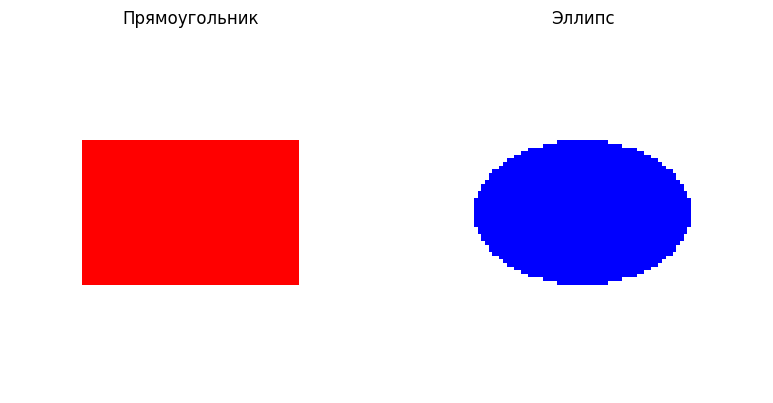

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def _normalize_color(color):
    """Приводит цвет к float в диапазоне [0, 1]"""
    color = np.array(color, dtype=float)
    if color.max() > 1.0:
        color = color / 255.0
    return color

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Нормализуем цвета
    bg = _normalize_color(background_color)
    rect_col = _normalize_color(rectangle_color)
    
    # Создаём изображение фона
    image = np.tile(bg, (m, n, 1))  # shape (m, n, 3)
    
    # Центрируем прямоугольник
    y_start = (m - b) // 2
    y_end = y_start + b
    x_start = (n - a) // 2
    x_end = x_start + a
    
    # Ограничиваем, чтобы не выйти за границы
    y_start = max(0, y_start)
    y_end = min(m, y_end)
    x_start = max(0, x_start)
    x_end = min(n, x_end)
    
    # Заполняем прямоугольник
    image[y_start:y_end, x_start:x_end] = rect_col
    return image


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    if a <= 0 or b <= 0:
        raise ValueError("Полуоси эллипса должны быть положительными")
    
    bg = _normalize_color(background_color)
    ell_col = _normalize_color(ellipse_color)
    
    image = np.tile(bg, (m, n, 1))
    
    # Центры пикселей и центр изображения
    y = np.arange(m).reshape(-1, 1)      # (m, 1)
    x = np.arange(n).reshape(1, -1)      # (1, n)
    y0 = (m - 1) / 2.0
    x0 = (n - 1) / 2.0
    
    mask = ((x - x0) / a)**2 + ((y - y0) / b)**2 <= 1.0
    image[mask] = ell_col
    return image




def test_draw_rectangle_basic():
    img = draw_rectangle(a=2, b=2, m=4, n=4, rectangle_color=(255, 0, 0), background_color=(0, 0, 255))
    # Центр 2x2 должен быть красным, остальное — синим
    expected = np.array([
        [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]],
        [[0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1]],
        [[0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1]],
        [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]
    ])
    assert np.allclose(img, expected)

def test_draw_ellipse_centered():
    img = draw_ellipse(a=2, b=2, m=5, n=5, ellipse_color=(0, 255, 0), background_color=(0, 0, 0))
    # Центр должен быть зелёным, форма — круглая
    center = img[2, 2]
    assert np.allclose(center, [0, 1, 0])  # зелёный

def test_rectangle_color_float():
    img = draw_rectangle(2, 2, 2, 2, (1.0, 0, 0), (0, 0, 1.0))
    assert np.allclose(img, np.array([[[1,0,0], [1,0,0]], [[1,0,0], [1,0,0]]]))

def test_ellipse_small():
    img = draw_ellipse(a=0.5, b=0.5, m=3, n=3, ellipse_color=(255,255,255), background_color=(0,0,0))
    # Только центральный пиксель должен быть белым
    assert np.array_equal(img[1,1], [1,1,1])
    assert np.array_equal(img[0,0], [0,0,0])

def test_rectangle_out_of_bounds():
    img = draw_rectangle(a=10, b=10, m=3, n=3, rectangle_color=(1,1,1), background_color=(0,0,0))
    # Прямоугольник больше изображения → всё белое
    assert np.allclose(img, 1.0)

def visualize_examples():
    # Пример визуализации
    rect_img = draw_rectangle(60, 40, 100, 100, (255, 0, 0), (255, 255, 255))
    ell_img = draw_ellipse(30, 20, 100, 100, (0, 0, 255), (255, 255, 255))
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(rect_img)
    plt.title("Прямоугольник")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(ell_img)
    plt.title("Эллипс")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Запуск тестов
if __name__ == "__main__":
    test_draw_rectangle_basic()
    test_draw_ellipse_centered()
    test_rectangle_color_float()
    test_ellipse_small()
    test_rectangle_out_of_bounds()
    visualize_examples()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
import numpy as np

def analyze_time_series(ts, p):
    ts = np.asarray(ts, dtype=float)
    if ts.ndim != 1:
        raise ValueError("Временной ряд должен быть одномерным")
    if len(ts) == 0:
        return {
            'mean': np.nan,
            'variance': np.nan,
            'std': np.nan,
            'local_maxima': np.array([], dtype=int),
            'local_minima': np.array([], dtype=int),
            'moving_average': np.array([])
        }
    
    # Статистики
    mean_val = np.mean(ts)
    variance_val = np.var(ts)
    std_val = np.std(ts)
    
    # Локальные экстремумы
    if len(ts) < 3:
        local_maxima = np.array([], dtype=int)
        local_minima = np.array([], dtype=int)
    else:
        # Используем np.diff и знаки для поиска экстремумов
        # Альтернатива: сравнение с соседями
        local_maxima = []
        local_minima = []
        for i in range(1, len(ts) - 1):
            if ts[i] > ts[i - 1] and ts[i] > ts[i + 1]:
                local_maxima.append(i)
            elif ts[i] < ts[i - 1] and ts[i] < ts[i + 1]:
                local_minima.append(i)
        local_maxima = np.array(local_maxima, dtype=int)
        local_minima = np.array(local_minima, dtype=int)
    
    # Скользящее среднее
    if p <= 0:
        raise ValueError("Размер окна p должен быть положительным целым числом")
    if p > len(ts):
        moving_avg = np.array([])
    else:
        # Эффективное вычисление через свёртку
        moving_avg = np.convolve(ts, np.ones(p) / p, mode='valid')
    
    return {
        'mean': mean_val,
        'variance': variance_val,
        'std': std_val,
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'moving_average': moving_avg
    }


def test_analyze_time_series_basic():
    ts = [1, 3, 2, 5, 4]
    result = analyze_time_series(ts, p=3)
    
    assert np.isclose(result['mean'], 3.0)
    assert np.isclose(result['variance'], 2.0)
    assert np.isclose(result['std'], np.sqrt(2.0))
    assert np.array_equal(result['local_maxima'], np.array([1, 3]))
    assert np.array_equal(result['local_minima'], np.array([2]))
    # Скользящее среднее: [ (1+3+2)/3, (3+2+5)/3, (2+5+4)/3 ] = [2.0, 3.333..., 3.666...]
    expected_ma = np.array([2.0, 10/3, 11/3])
    assert np.allclose(result['moving_average'], expected_ma)

def test_analyze_time_series_edge_cases():
    # Пустой ряд
    result = analyze_time_series([], p=1)
    assert np.isnan(result['mean'])
    assert len(result['local_maxima']) == 0
    assert len(result['moving_average']) == 0

    # Один элемент
    result = analyze_time_series([5], p=1)
    assert np.isclose(result['mean'], 5)
    assert len(result['local_maxima']) == 0
    assert np.isclose(result['moving_average'], [5])

    # Два элемента — нет экстремумов
    result = analyze_time_series([1, 2], p=2)
    assert len(result['local_maxima']) == 0
    assert len(result['local_minima']) == 0
    assert np.allclose(result['moving_average'], [1.5])

def test_analyze_time_series_plateau():
    # Плато: [1, 2, 2, 1] — нет локальных максимумов по строгому определению
    result = analyze_time_series([1, 2, 2, 1], p=2)
    assert len(result['local_maxima']) == 0  # потому что 2 не > 2
    assert len(result['local_minima']) == 0

def test_analyze_time_series_moving_average_length():
    ts = np.arange(10)
    p = 4
    result = analyze_time_series(ts, p)
    assert len(result['moving_average']) == len(ts) - p + 1 == 7

# Запуск тестов
if __name__ == "__main__":
    test_analyze_time_series_basic()
    test_analyze_time_series_edge_cases()
    test_analyze_time_series_plateau()
    test_analyze_time_series_moving_average_length()
    print("Все тесты пройдены")



Все тесты пройдены!


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [22]:


def one_hot_encode(labels):
    labels = np.asarray(labels)
    if labels.size == 0:
        return np.empty((0, 0), dtype=int)
    
    if labels.ndim != 1:
        raise ValueError("Входной вектор должен быть одномерным")
    
    if not np.issubdtype(labels.dtype, np.integer):
        # Попытаемся преобразовать, если возможно
        try:
            labels = labels.astype(int)
        except (ValueError, TypeError):
            raise ValueError("Метки должны быть целыми числами")
    
    if np.any(labels < 0):
        raise ValueError("Метки должны быть неотрицательными целыми числами")
    
    n_classes = np.max(labels) + 1
    n_samples = labels.shape[0]
    
    # Создаём матрицу нулей
    one_hot = np.zeros((n_samples, n_classes), dtype=int)
    # Используем advanced indexing для установки единиц
    one_hot[np.arange(n_samples), labels] = 1
    
    return one_hot


def test_one_hot_encode_basic():
    labels = [0, 2, 3, 0]
    expected = np.array([
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]
    ])
    result = one_hot_encode(labels)
    assert np.array_equal(result, expected)

def test_one_hot_encode_single_class():
    labels = [0, 0, 0]
    expected = np.array([[1], [1], [1]])
    result = one_hot_encode(labels)
    assert np.array_equal(result, expected)

def test_one_hot_encode_consecutive():
    labels = [0, 1, 2]
    expected = np.eye(3, dtype=int)
    result = one_hot_encode(labels)
    assert np.array_equal(result, expected)

def test_one_hot_encode_empty():
    result = one_hot_encode([])
    expected = np.empty((0, 0), dtype=int)
    assert np.array_equal(result, expected)

def test_one_hot_encode_numpy_array():
    labels = np.array([1, 0, 1])
    expected = np.array([
        [0, 1],
        [1, 0],
        [0, 1]
    ])
    result = one_hot_encode(labels)
    assert np.array_equal(result, expected)

def test_one_hot_encode_with_dtype():
    labels = np.array([0, 1, 2], dtype=np.int32)
    result = one_hot_encode(labels)
    assert result.dtype == int
    assert result.shape == (3, 3)

def test_one_hot_encode_non_negative():
    try:
        one_hot_encode([-1, 0, 1])
        assert False, "Должна быть ошибка для отрицательных меток"
    except ValueError:
        pass

if __name__ == "__main__":
    test_one_hot_encode_basic()
    test_one_hot_encode_single_class()
    test_one_hot_encode_consecutive()
    test_one_hot_encode_empty()
    test_one_hot_encode_numpy_array()
    test_one_hot_encode_with_dtype()
    test_one_hot_encode_non_negative()